In [1]:
from preprocessing import (
    preprocess_kjv,
)
from ontology_algorithm import (
    draw_hierarchy_tree_from_ontology,
)
from integrative_worklow import (
    construct_topic_modeling_concept_hierarchy,
)

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [15]:
kjv_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/t_kjv.csv"
kjv_bible_df = preprocess_kjv(
    path_to_kjv=kjv_path,
)

# Get book column unique values.
all_books = kjv_bible_df["book"].unique()

# Not possible to give just one book yet... Should fix this. TODO
# If you want to give just one book, you need to give two and then
# choose the first one as `chosen_chapter` in the next cell.
# Comment the next line out if you want to run the whole bible.
all_books = ['Genesis', 'Exodus']

# Specify the number of top words to use.
n = 70

books = []
for book in all_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    book_text = ""
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        book_text += " ".join(chapter_df["text"].values)
    books.append(book_text)

sentences_per_book = []
for book in all_books:
    book_sentences = []
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        book_sentences.append(" ".join(chapter_df["text"].values))
    sentences_per_book.append(book_sentences)

sentences_per_chapter = sentences_per_book
titles = all_books
chapters = books

## Contruct the ontology tree using the integrative workflow

CLUSTER #1
Cluster Chapters: [0]
Key Features: ['esau', 'begat', 'abram', 'laban', 'rachel', 'noah', 'lived', 'sarah', 'years begat', 'leah', 'duke', 'rebekah', 'lot', 'dream', 'unto joseph', 'abimelech', 'famine', 'god hath', 'sodom', 'jacob said']
CLUSTER #2
Cluster Chapters: [1]
Key Features: ['moses', 'aaron', 'tabernacle', 'unto moses', 'holy', 'sockets', 'congregation', 'moses said', 'rings', 'blue', 'boards', 'pillars', 'pure', 'ephod', 'court', 'moses aaron', 'staves', 'shittim', 'shittim wood', 'blue purple']

 Chosen chapters  [0]
Removing the following terms:  ['begat', 'lived', 'years begat', 'jacob said']
Removing  rachel  from current_level_words, it will be a child of  laban
Removing  sodom  from current_level_words, it will be a child of  lot
Removing  leah  from current_level_words, it will be a child of  laban
Removing  lot  from current_level_words, it will be a child of  abram
Removing  sarah  from current_level_words, it will be a child of  abimelech

 Current leve

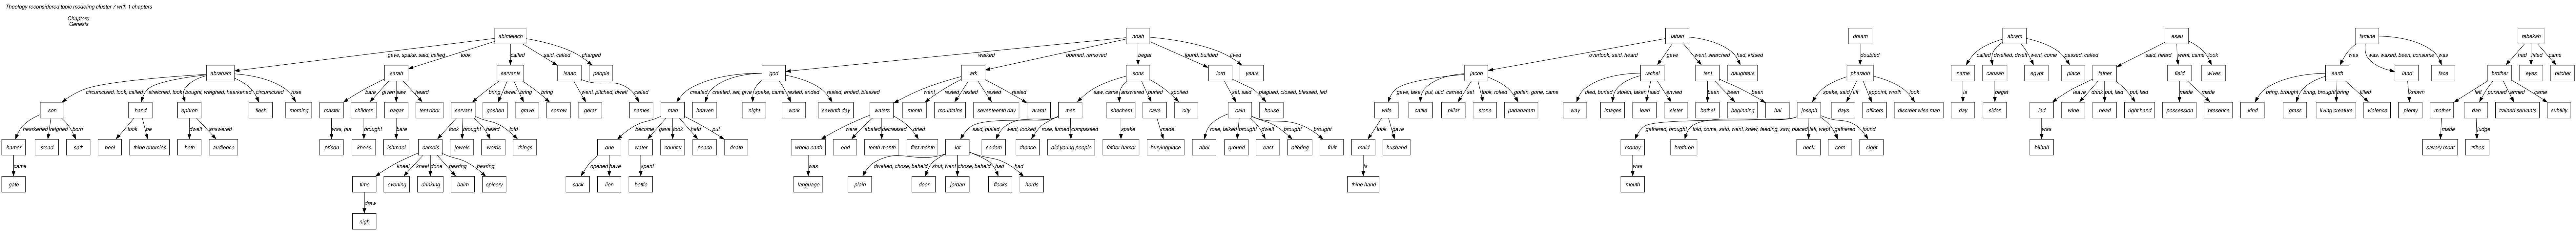

In [18]:
(
    ontology_hierarchy,
    all_relations_to_verbs,
    chapter_titles,
) = construct_topic_modeling_concept_hierarchy(
    chapters=chapters,
    titles=titles,
    sentences_per_chapter=sentences_per_chapter,
    num_topics=2,
    chosen_cluster=1,
    hierarchy_depth=5,
    hierarchy_max_width=5,
    n_key_terms=20,
    manually_added_roots=None,
    verbose=True,
)
# Draw the ontology hierarchy.
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=all_relations_to_verbs,
    title="Theology reconsidered topic modeling cluster "
    + str(7)
    + " with "
    + str(len(chapter_titles))
    + " chapters",
    topic_modelling_chapters=chapter_titles,
)